


#  **Análisis del comportamiento de los consumidores de una compañía del sector de la moda**



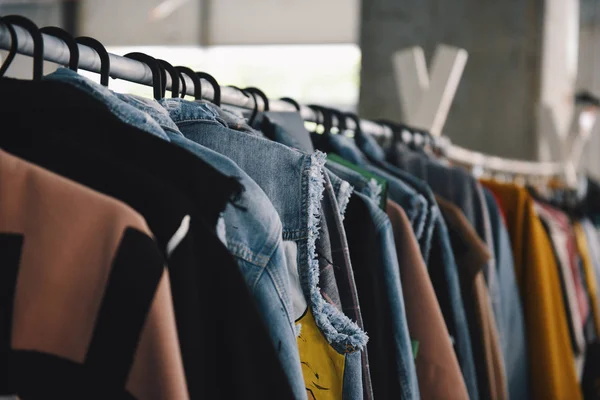

In [52]:
from IPython.display import Image

ruta_imagen_colab = '/content/foto.jpg'

ancho_deseado =1000

display(Image(filename=ruta_imagen_colab, width=ancho_deseado))

El presente análisis de datos se centra en descubrir los patrones de comportamiento de los consumidores de una compañía de ropa. La capacidad para comprender las preferencias y decisiones de los consumidores es esencial para el éxito en una industria tan dinámica y competitiva como la moda.

Para llevar a cabo este análisis, se empleará un DataFrame que contiene información detallada sobre transacciones y productos de los clientes.

Mediante este análisis se responden preguntas como: ¿Cúal es la edad de los clienes principales?¿y su género?¿Cuáles son los productos más populares entre los consumidores?

La visualización de los datos proporciona una perspectiva más clara sobre el perfil del consumidor, permitiendo a la compañía de ropa tomar decisiones  estratégicas para optimizar su presencia en el mercado y ofrecer una experiencia de compra más satisfactoria.

In [53]:
import pandas as pd
df = pd.read_csv("/content/dataset.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## **Representación del volumen de clientes de la compañía según sus edades**

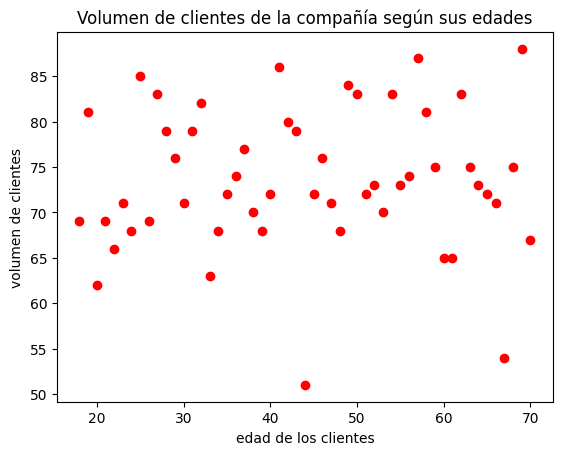

In [54]:
import matplotlib.pyplot as plt

edades_total=df['Age'].value_counts()

plt.plot([edades_total.index],[edades_total.values],'ro')
plt.title('Volumen de clientes de la compañía según sus edades')
plt.ylabel('volumen de clientes')
plt.xlabel('edad de los clientes')
plt.show()

Tal y como se observa en el gráfico anterior, la clientela de la tienda abarca diversas edades, es evidente al ver la distribución equitativa de clientes que oscila entre 60 y 85 en cada grupo de edad. No se percibe una tendencia clara de aumento o disminución con respecto a la edad. Por lo tanto, se recomienda que la tienda ofrezca productos que satisfagan una amplia gama de estilos, desde opciones más juveniles hasta prendas más conservadoras.

## **Género que representa mayor volumen de compras**

In [55]:
mujeres =df[df.Gender == 'Female']
clientes_mujer = len(mujeres)
hombres =df[df.Gender == 'Male']
clientes_hombre = len(hombres)
total_clientes = clientes_hombre + clientes_mujer

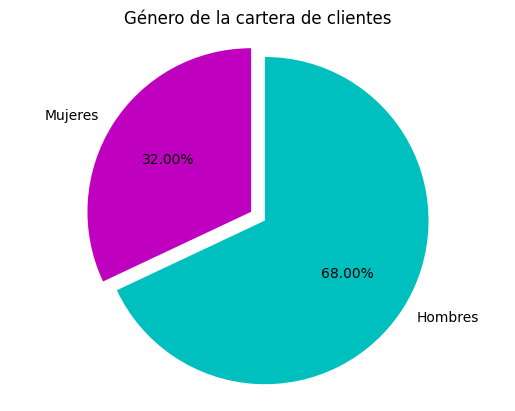

In [56]:
import matplotlib.pyplot as plt

labels = 'Mujeres','Hombres',
sections = [(clientes_mujer/total_clientes)*100, (clientes_hombre/total_clientes)*100]
colors = ['m', 'c']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Género de la cartera de clientes')
plt.show()

En el gáfico anterior se aprecia que hay un porcentaje mucho mayor de clientes masculinos que femeninos. Por tanto, la tienda tiene que tener mucho más género para hombre que para mujer. Además las estrategias que siga la empresa tienen que responder al hecho de que tienen un público mayormente masculino.


## **Tipo de producto más vendido según el género**

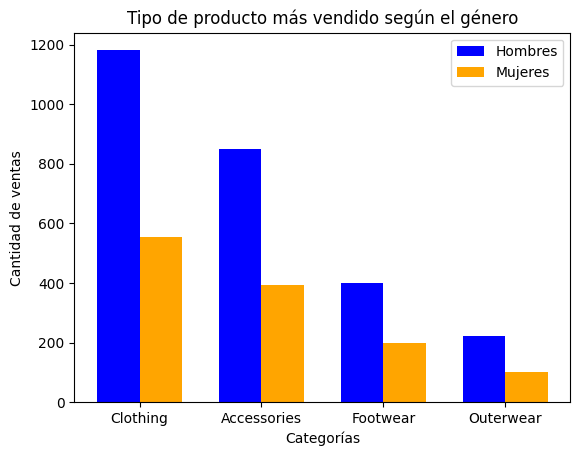

In [57]:
import matplotlib.pyplot as plt
import numpy as np

categorias_hombres = hombres['Category'].value_counts()
categorias_mujeres = mujeres['Category'].value_counts()

ancho_barra = 0.35
x_grupo_1 = np.arange(len(categorias_hombres.index))
x_grupo_2 = x_grupo_1 + ancho_barra

plt.bar(x_grupo_1, categorias_hombres.values, width=ancho_barra, label='Hombres', color='blue')
plt.bar(x_grupo_2, categorias_mujeres.values, width=ancho_barra, label='Mujeres', color='orange')

plt.xlabel('Categorías')
plt.ylabel('Cantidad de ventas')
plt.title('Tipo de producto más vendido según el género')
plt.xticks(x_grupo_1 + ancho_barra / 2, categorias_hombres.index)
plt.legend()

plt.show()


Del análisis previo, se destaca que tanto para hombre como para mujer, la categoría más significativa es la ropa, seguida de los accesorios. Esta observación subraya la importancia para la empresa de concentrar sus esfuerzos en ampliar su oferta de productos dentro de estas categorías. Dado que la categoría de ropa abarca una amplia gama de productos fabricados por la compañía, resulta igualmente relevante identificar qué tipo de prendas específicas son más demandadas. Por esta razón, se procederá a realizar un análisis detallado para determinar cuáles son los productos de ropa más buscados tanto por hombres como por mujeres.

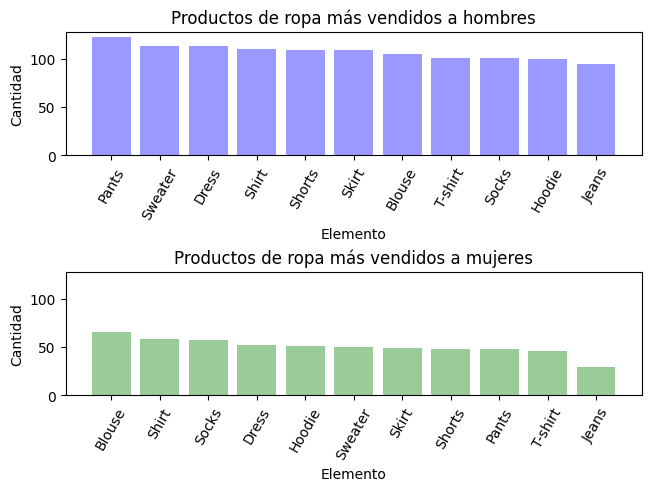

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(layout="constrained")

mosaic = "A;B"
ax_dict = fig.subplot_mosaic(mosaic)

item_hombres = hombres[hombres.Category == 'Clothing']['Item Purchased'].value_counts()
item_mujeres = mujeres[mujeres.Category == 'Clothing']['Item Purchased'].value_counts()

ax_dict['A'].bar(item_hombres.index, item_hombres.values, color='blue', alpha=0.4, label='Barra A')
ax_dict['B'].bar(item_mujeres.index,item_mujeres.values, color='green', alpha=0.4, label='Barra B')

max_y_value = max(max(item_hombres.values), max(item_mujeres.values))
ax_dict['A'].set_ylim(0, max_y_value+5)
ax_dict['B'].set_ylim(0, max_y_value+5)

ax_dict['A'].set_title('Productos de ropa más vendidos a hombres')
ax_dict['A'].set_xlabel('Elemento')
ax_dict['A'].set_ylabel('Cantidad')

ax_dict['B'].set_title('Productos de ropa más vendidos a mujeres')
ax_dict['B'].set_xlabel('Elemento')
ax_dict['B'].set_ylabel('Cantidad')

ax_dict['A'].tick_params(axis='x', rotation=60)
ax_dict['B'].tick_params(axis='x', rotation=60)


La revisión de los gráficos de barras revela la necesidad de adoptar estrategias diferenciadas para los segmentos masculino y femenino de la clientela de la compañía. Esto se debe a que las mujeres muestran una mayor demanda de blusas y camisetas, mientras que los hombres muestran mayor interes en pantalones y suéteres dentro del catálogo de productos de la empresa.


## **Distribución de la demanda de tallas de los clientes**




Text(0.5, 1.0, 'Demanda de tallas de los clientes')

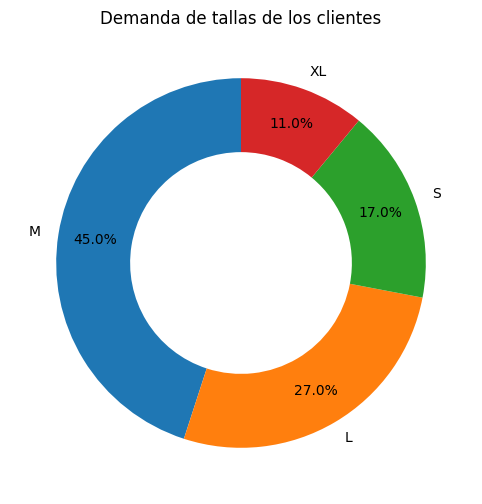

In [59]:
talla = df.Size.value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(talla.values, labels=talla.index, autopct='%1.1f%%', startangle=90, pctdistance=0.80,textprops={'color': 'black'}, wedgeprops=dict(width=0.4))
plt.title('Demanda de tallas de los clientes')


En el gráfico anterior se evidencia que el 45% de los clientes de la compañía prefieren la talla M. Este dato es esencial para la planificación de la producción, ya que proporciona una perspectiva clara sobre la proporción de productos que deben fabricarse en cada talla. De esta forma se realizará una gestión eficiente y adaptada a las preferencias de los consumidores.